#FOMC statement sentiment Analysis

The codes can scrape the FOMC statement form the federal reserve's website with the date of the FOMC meeting.

I will use the VADER sentiment analyzer as a starting point, since it's straightforward to implement and can provide reasonable results for financial texts. However, I may need to fine-tune the lexicon used by VADER to better capture the specific language used in FOMC statements.




In [1]:
from bs4 import BeautifulSoup
import requests
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import re
nltk.download('vader_lexicon')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.tag import pos_tag, PerceptronTagger
from collections import Counter

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
custom_words = ['committee', 'rate', 'federal', 'percent', 'range']

for word in custom_words:
    stop_words.add(word)

nltk.download('averaged_perceptron_tagger')
!python -m nltk.downloader punkt



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mikeyraffanti/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mikeyraffanti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mikeyraffanti/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


/Users/mikeyraffanti/opt/anaconda3/lib/python3.9/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mikeyraffanti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
fomc=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRxy9-y_w65YIJsU6eHtjeiqLrXGkUWMHjiObfJG81223b78M8MUrIt5jIiKYF0qw/pub?output=csv")

In [3]:

def extract_fomc_statement(date):
  #scrape information from the Fed's website
  response = requests.get(f'https://www.federalreserve.gov/newsevents/pressreleases/monetary{date}a.htm')
  html_content = response.text
  soup = BeautifulSoup(html_content, 'html.parser')

  # Find the main content container with the specified classes
  main_container = soup.find('div', class_='container__main')

  # Find all paragraphs within the main container
  paragraphs = main_container.find_all('p')

  # Exclude the first paragraph (heading) and the last paragraph
  relevant_paragraphs = paragraphs[2:-1]

  # Extract and concatenate the text from the relevant paragraphs
  statement_text = ' '.join(p.get_text().strip() for p in relevant_paragraphs)
  statement_text = re.sub(r'Voting for the(?: FOMC)?[\s\S]*?(?:\d|\]).', '', statement_text)

  return statement_text

In [4]:

# def text1(df):
#   strings = [re.sub('\s+', ' ', text) for text in df["text"]]


#   strings = [re.sub('[^a-zA-Z0-9]+', ' ',text) for text in strings]


#   strings = [re.sub('Romanized', ' ', text) for text in strings]
#   tokenized_strings = []
#   tokenizer = RegexpTokenizer(r'\w+')
#   tokenized_strings.extend(tokenizer.tokenize(strings.lower()))

#   counter = Counter(tokenized_strings)

#   top_20_tokens = counter.most_common(20)

#   tokenized_lyrics_no_stop = []
#   stop_words = stopwords.words('english')

#   excluded_words = ["committee","federal"]

#   for token in tokenized_strings:
#       if token not in stop_words and token not in excluded_words:
#           tokenized_lyrics_no_stop.append(token)

#   top_20_stems = Counter(tokenized_lyrics_no_stop).most_common(20)


#   return top_20_stems

In [5]:

def text1(text):
  strings = re.sub('\s+', ' ', text)


  strings = re.sub('[^a-zA-Z0-9]+', ' ',text)


  strings = re.sub('Romanized', ' ', text)
  tokenized_strings = []
  tokenizer = RegexpTokenizer(r'\w+')
  tokenized_strings.extend(tokenizer.tokenize(strings.lower()))

  counter = Counter(tokenized_strings)

  top_20_tokens = counter.most_common(20)

  tokenized_lyrics_no_stop = []
  stop_words = stopwords.words('english')

  excluded_words = ["committee","federal"]

  for token in tokenized_strings:
      if token not in stop_words and token not in excluded_words:
          tokenized_lyrics_no_stop.append(token)

  top_20_stems = Counter(tokenized_lyrics_no_stop).most_common(20)


  return top_20_stems

In [6]:
sia = SentimentIntensityAnalyzer()
def sentiment(text):
  sentiment_s=sia.polarity_scores(text)
  return sentiment_s

In [7]:
fomc["text"]=fomc["Date"].apply(extract_fomc_statement)

In [8]:
fomc["sentiment"]=fomc["text"].apply(sentiment)

In [9]:
fomc["freq"]=fomc["text"].apply(text1)


In [10]:
fomc['concern'] = fomc['freq'].apply(lambda x: next((t[0] for t in x if t[0] in ['inflation', 'economic']), None))

In [11]:
fomc

,Date,text,sentiment,freq,concern
0,20230503,Economic activity expanded at a modest pace in...,"{'neg': 0.059, 'neu': 0.87, 'pos': 0.071, 'com...","[(inflation, 9), (policy, 6), (economic, 5), (...",inflation
1,20230322,Recent indicators point to modest growth in sp...,"{'neg': 0.053, 'neu': 0.875, 'pos': 0.071, 'co...","[(inflation, 9), (policy, 7), (monetary, 6), (...",inflation
2,20230201,Recent indicators point to modest growth in sp...,"{'neg': 0.091, 'neu': 0.832, 'pos': 0.077, 'co...","[(inflation, 8), (monetary, 5), (policy, 5), (...",inflation
3,20221214,Recent indicators point to modest growth in sp...,"{'neg': 0.089, 'neu': 0.844, 'pos': 0.067, 'co...","[(inflation, 9), (economic, 5), (monetary, 5),...",inflation
4,20221102,Recent indicators point to modest growth in sp...,"{'neg': 0.089, 'neu': 0.839, 'pos': 0.073, 'co...","[(inflation, 9), (economic, 5), (monetary, 5),...",inflation
...,...,...,...,...,...
135,20060808,The Federal Open Market Committee decided toda...,"{'neg': 0.072, 'neu': 0.835, 'pos': 0.093, 'co...","[(inflation, 6), (market, 2), (economic, 2), (...",inflation
136,20060629,The Federal Open Market Committee decided toda...,"{'neg': 0.049, 'neu': 0.839, 'pos': 0.112, 'co...","[(inflation, 6), (economic, 3), (growth, 3), (...",inflation
137,20060510,The Federal Open Market Committee decided toda...,"{'neg': 0.019, 'neu': 0.882, 'pos': 0.099, 'co...","[(inflation, 4), (economic, 3), (growth, 3), (...",inflation
138,20060328,The Federal Open Market Committee decided toda...,"{'neg': 0.023, 'neu': 0.873, 'pos': 0.103, 'co...","[(growth, 4), (economic, 3), (inflation, 3), (...",economic


In [12]:
groupeddf=fomc.groupby("concern")


#Divide the DF into inflation  focus and economic focus

In [13]:
# Group the DataFrame by 'first_term'


# Dictionary to store each separate DataFrame
dfs = {}

# Iterate over the GroupBy object to get each separate DataFrame
for term, group_df in groupeddf:
    if term == 'inflation':
        df_inflation = group_df
    elif term == 'economic':
        df_economic = group_df


In [14]:
df_inflation

,Date,text,sentiment,freq,concern
0,20230503,Economic activity expanded at a modest pace in...,"{'neg': 0.059, 'neu': 0.87, 'pos': 0.071, 'com...","[(inflation, 9), (policy, 6), (economic, 5), (...",inflation
1,20230322,Recent indicators point to modest growth in sp...,"{'neg': 0.053, 'neu': 0.875, 'pos': 0.071, 'co...","[(inflation, 9), (policy, 7), (monetary, 6), (...",inflation
2,20230201,Recent indicators point to modest growth in sp...,"{'neg': 0.091, 'neu': 0.832, 'pos': 0.077, 'co...","[(inflation, 8), (monetary, 5), (policy, 5), (...",inflation
3,20221214,Recent indicators point to modest growth in sp...,"{'neg': 0.089, 'neu': 0.844, 'pos': 0.067, 'co...","[(inflation, 9), (economic, 5), (monetary, 5),...",inflation
4,20221102,Recent indicators point to modest growth in sp...,"{'neg': 0.089, 'neu': 0.839, 'pos': 0.073, 'co...","[(inflation, 9), (economic, 5), (monetary, 5),...",inflation
...,...,...,...,...,...
133,20061025,The Federal Open Market Committee decided toda...,"{'neg': 0.066, 'neu': 0.873, 'pos': 0.061, 'co...","[(inflation, 6), (market, 2), (economic, 2), (...",inflation
134,20060920,The Federal Open Market Committee decided toda...,"{'neg': 0.067, 'neu': 0.871, 'pos': 0.062, 'co...","[(inflation, 6), (market, 2), (economic, 2), (...",inflation
135,20060808,The Federal Open Market Committee decided toda...,"{'neg': 0.072, 'neu': 0.835, 'pos': 0.093, 'co...","[(inflation, 6), (market, 2), (economic, 2), (...",inflation
136,20060629,The Federal Open Market Committee decided toda...,"{'neg': 0.049, 'neu': 0.839, 'pos': 0.112, 'co...","[(inflation, 6), (economic, 3), (growth, 3), (...",inflation


In [15]:
df_economic

,Date,text,sentiment,freq,concern
22,20200729,The Federal Reserve is committed to using its ...,"{'neg': 0.049, 'neu': 0.831, 'pos': 0.12, 'com...","[(economic, 6), (inflation, 6), (economy, 5), ...",economic
23,20200610,The Federal Reserve is committed to using its ...,"{'neg': 0.048, 'neu': 0.839, 'pos': 0.112, 'co...","[(economic, 6), (inflation, 6), (range, 4), (s...",economic
24,20200429,The Federal Reserve is committed to using its ...,"{'neg': 0.057, 'neu': 0.841, 'pos': 0.102, 'co...","[(economic, 7), (inflation, 6), (conditions, 5...",economic
26,20200303,The fundamentals of the U.S. economy remain st...,"{'neg': 0.067, 'neu': 0.843, 'pos': 0.091, 'co...","[(1, 3), (economy, 2), (risks, 2), (economic, ...",economic
85,20121024,Information received since the Federal Open Ma...,"{'neg': 0.056, 'neu': 0.765, 'pos': 0.18, 'com...","[(economic, 6), (securities, 6), (agency, 5), ...",economic
86,20120913,Information received since the Federal Open Ma...,"{'neg': 0.052, 'neu': 0.789, 'pos': 0.159, 'co...","[(economic, 6), (policy, 6), (securities, 6), ...",economic
87,20120801,Information received since the Federal Open Ma...,"{'neg': 0.068, 'neu': 0.839, 'pos': 0.094, 'co...","[(economic, 7), (rate, 6), (inflation, 5), (ye...",economic
93,20111102,Information received since the Federal Open Ma...,"{'neg': 0.07, 'neu': 0.801, 'pos': 0.129, 'com...","[(economic, 7), (inflation, 7), (securities, 5...",economic
103,20100810,Information received since the Federal Open Ma...,"{'neg': 0.081, 'neu': 0.807, 'pos': 0.112, 'co...","[(economic, 6), (inflation, 5), (securities, 5...",economic
104,20100623,Information received since the Federal Open Ma...,"{'neg': 0.102, 'neu': 0.788, 'pos': 0.109, 'co...","[(economic, 6), (inflation, 5), (recovery, 3),...",economic


#**Yearly analysis**

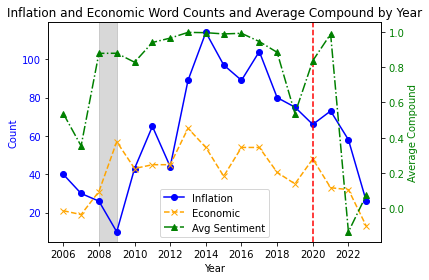

In [16]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime object
fomc['Date1'] = pd.to_datetime(fomc['Date'], format='%Y%m%d')

# Extract year from the 'Date' column
fomc['Year'] = fomc['Date1'].dt.year

# Extract first value from each list in 'freq' column
fomc['Inflation'] = fomc['freq'].apply(lambda x: dict(x).get('inflation', 0))
fomc['Economic'] = fomc['freq'].apply(lambda x: dict(x).get('economic', 0))

# Extract compound score from 'sentiment' column
fomc['Compound'] = fomc['sentiment'].apply(lambda x: x['compound'])

# Group by 'Year' and calculate sum and mean
yearly_counts = fomc.groupby('Year')[['Inflation', 'Economic']].sum()
yearly_avg_compound = fomc.groupby('Year')['Compound'].mean()

# Create separate lists for each plot
years = yearly_counts.index.tolist()
inflation_counts = yearly_counts['Inflation'].tolist()
economic_counts = yearly_counts['Economic'].tolist()
avg_compound_values = yearly_avg_compound.tolist()

# Create the plot
fig, ax1 = plt.subplots()

# Plot the data on the primary y-axis
line1 = ax1.plot(years, inflation_counts, label='Inflation', marker='o', linestyle='-', color='blue')
line2 = ax1.plot(years, economic_counts, label='Economic', marker='x', linestyle='--', color='orange')

# Highlight the years 2008-2009 with a shaded region and 2023 with a dashed line
ax1.axvspan(2008, 2009, color='gray', alpha=0.3)
ax1.axvline(2020, color='red', linestyle='--')

# Customize the plot for the primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Set x-axis to display integer years
ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Remove grid lines
ax1.grid(False)

# Create the secondary y-axis and plot the data on it
ax2 = ax1.twinx()
line3 = ax2.plot(years, avg_compound_values, label='Avg Sentiment', marker='^', linestyle='-.', color='green')

# Customize the plot for the secondary y-axis
ax2.set_ylabel('Average Compound', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Remove grid lines
ax2.grid(False)

# Set the plot title
plt.title('Inflation and Economic Word Counts and Average Compound by Year')

# Combine legends
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc=0)

# Show the plot
plt.tight_layout()
plt.show()



In [17]:
fomc

,Date,text,sentiment,freq,concern,Date1,Year,Inflation,Economic,Compound
0,20230503,Economic activity expanded at a modest pace in...,"{'neg': 0.059, 'neu': 0.87, 'pos': 0.071, 'com...","[(inflation, 9), (policy, 6), (economic, 5), (...",inflation,2023-05-03,2023,9,5,0.4019
1,20230322,Recent indicators point to modest growth in sp...,"{'neg': 0.053, 'neu': 0.875, 'pos': 0.071, 'co...","[(inflation, 9), (policy, 7), (monetary, 6), (...",inflation,2023-03-22,2023,9,4,0.6486
2,20230201,Recent indicators point to modest growth in sp...,"{'neg': 0.091, 'neu': 0.832, 'pos': 0.077, 'co...","[(inflation, 8), (monetary, 5), (policy, 5), (...",inflation,2023-02-01,2023,8,4,-0.8248
3,20221214,Recent indicators point to modest growth in sp...,"{'neg': 0.089, 'neu': 0.844, 'pos': 0.067, 'co...","[(inflation, 9), (economic, 5), (monetary, 5),...",inflation,2022-12-14,2022,9,5,-0.8442
4,20221102,Recent indicators point to modest growth in sp...,"{'neg': 0.089, 'neu': 0.839, 'pos': 0.073, 'co...","[(inflation, 9), (economic, 5), (monetary, 5),...",inflation,2022-11-02,2022,9,5,-0.7845
...,...,...,...,...,...,...,...,...,...,...
135,20060808,The Federal Open Market Committee decided toda...,"{'neg': 0.072, 'neu': 0.835, 'pos': 0.093, 'co...","[(inflation, 6), (market, 2), (economic, 2), (...",inflation,2006-08-08,2006,6,2,0.6697
136,20060629,The Federal Open Market Committee decided toda...,"{'neg': 0.049, 'neu': 0.839, 'pos': 0.112, 'co...","[(inflation, 6), (economic, 3), (growth, 3), (...",inflation,2006-06-29,2006,6,3,0.9441
137,20060510,The Federal Open Market Committee decided toda...,"{'neg': 0.019, 'neu': 0.882, 'pos': 0.099, 'co...","[(inflation, 4), (economic, 3), (growth, 3), (...",inflation,2006-05-10,2006,4,3,0.9481
138,20060328,The Federal Open Market Committee decided toda...,"{'neg': 0.023, 'neu': 0.873, 'pos': 0.103, 'co...","[(growth, 4), (economic, 3), (inflation, 3), (...",economic,2006-03-28,2006,3,3,0.9468


#**Difference in Positive and Negative**

In [18]:
sia = SentimentIntensityAnalyzer()
def sentiment(text):
  sentiment_s=sia.polarity_scores(text)
  return sentiment_s
fomc["sentiment"]=fomc["text"].apply(sentiment)

In [19]:
# Create a new column 'sentiment_label'

fomc['sentiment_label'] = fomc['sentiment'].apply(lambda x: 'positive' if x['compound'] > 0 else 'negative')

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words, min_font_size=10).generate(text)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(title)
    plt.show()

# Get the text of the positive and negative sentiment
positive_text = ' '.join(fomc[fomc['sentiment_label'] == 'positive']['text'])
negative_text = ' '.join(fomc[fomc['sentiment_label'] == 'negative']['text'])

# Generate word clouds for positive and negative sentiment
generate_wordcloud(positive_text, 'Word Cloud of Positive Sentiment')
generate_wordcloud(negative_text, 'Word Cloud of Negative Sentiment')

ValueError: Only supported for TrueType fonts

In [ ]:
import seaborn as sns
def top_words(text, num_words=20):
    tokens = nltk.word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha()]
    tokens_no_stop = [token for token in tokens if token not in stop_words]
    counter = Counter(tokens_no_stop)
    return counter.most_common(num_words)

# Get the top 10 positive and negative words
top_positive_words = top_words(positive_text, 10)
top_negative_words = top_words(negative_text, 10)

# Create DataFrames for positive and negative words
positive_df = pd.DataFrame(top_positive_words, columns=['word', 'count'])
negative_df = pd.DataFrame(top_negative_words, columns=['word', 'count'])

# Plot the bar chart for positive words
plt.figure(figsize=(6, 3))
positive_plot = sns.barplot(x='word', y='count', data=positive_df)
positive_plot.set_xlabel('')
positive_plot.set_ylabel('')
plt.xticks(rotation=25)
plt.show()

# Plot the bar chart for negative words
plt.figure(figsize=(6, 3))
negative_plot = sns.barplot(x='word', y='count', data=negative_df)
negative_plot.set_xlabel('')
negative_plot.set_ylabel('')
plt.xticks(rotation=25)
plt.show()


#Stock Price

In [ ]:
import yfinance as yf
from datetime import datetime, timedelta
hist=yf.Ticker("^GSPC").history(start="2006-01-01",end="2023-06-26")
df_inflation['Date'] = pd.to_datetime(df_inflation['Date'], format='%Y%m%d')
df_economic['Date'] = pd.to_datetime(df_economic['Date'], format='%Y%m%d')

def pricen (date):
  try:
    date=str(date)[:10]
    # convert the date string to a datetime object
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # subtract one days from the date object
    new_date_obj = date_obj - timedelta(days=1)

    # convert the new date object back to a string with the desired format
    new_date = new_date_obj.strftime("%Y-%m-%d")
    return float(hist.loc[new_date]["Close"])
  except:
    try:
      # convert the date string to a datetime object
      date_obj = datetime.strptime(date, "%Y-%m-%d")

      # subtract two days from the date object
      new_date_obj = date_obj - timedelta(days=2)

      # convert the new date object back to a string with the desired format
      new_date = new_date_obj.strftime("%Y-%m-%d")
      return float(hist.loc[new_date]["Close"])
    except:
      # convert the date string to a datetime object
      date_obj = datetime.strptime(date, "%Y-%m-%d")

      # subtract nine days from the date object
      new_date_obj = date_obj - timedelta(days=6)

      # convert the new date object back to a string with the desired format
      new_date = new_date_obj.strftime("%Y-%m-%d")
      return float(hist.loc[new_date]["Close"])

def price1 (date):
  date=str(date)[:10]
  try:
    # convert the date string to a datetime object
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # subtract one days from the date object
    new_date_obj = date_obj + timedelta(days=29)

    # convert the new date object back to a string with the desired format
    new_date = new_date_obj.strftime("%Y-%m-%d")
    return float(hist.loc[new_date]["Close"])
  except:
    try:
      # convert the date string to a datetime object
      date_obj = datetime.strptime(date, "%Y-%m-%d")
      # In case it's a holiday after 30 days.
      new_date_obj = date_obj + timedelta(days=31)

      # convert the new date object back to a string with the desired format
      new_date = new_date_obj.strftime("%Y-%m-%d")
      return float(hist.loc[new_date]["Close"])
    except:
      try:
        # convert the date string to a datetime object
        date_obj = datetime.strptime(date, "%Y-%m-%d")

        # In case it's a holiday weekend after 14 days.
        new_date_obj = date_obj + timedelta(days=14)

        # convert the new date object back to a string with the desired format
        new_date = new_date_obj.strftime("%Y-%m-%d")
        return float(hist.loc[new_date]["Close"])
      except:
        #The days between the FOMC and today is less than 30 days

        date_obj = datetime.strptime(date, "%Y-%m-%d")

        # In case it's a holiday weekend after 21 days.
        new_date_obj = date_obj + timedelta(days=21)

        # convert the new date object back to a string with the desired format
        new_date = new_date_obj.strftime("%Y-%m-%d")
        return float(hist.loc[new_date]["Close"])

df_inflation["close"]=df_inflation['Date'].apply(pricen)
df_economic["close"]=df_economic['Date'].apply(pricen)
df_inflation["close 1 month later"]=df_inflation['Date'].apply(price1)
df_economic["close 1 month later"]=df_economic['Date'].apply(price1)

In [ ]:
df_inflation["pct"]=(df_inflation["close 1 month later"]-df_inflation["close"])/df_inflation["close"]
df_economic["pct"]=(df_economic["close 1 month later"]-df_economic["close"])/df_economic["close"]

#Model

In [ ]:
#Packages
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
df1 = pd.concat([df_inflation.drop('sentiment', axis=1), df_inflation['sentiment'].apply(pd.Series)], axis=1)
df2 = pd.concat([df_economic.drop('sentiment', axis=1), df_economic['sentiment'].apply(pd.Series)], axis=1)

In [ ]:
#Prepare X and y needed
X = df1[["neg","neu"]]
X["compound_4"] = df1[["compound"]]**4
X["pos_2"] = df1[["pos"]]**2



X=sm.add_constant(X)
y = df1["pct"]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#function for the stepwise regression
def forward_selection(X, y):
    remaining_features = list(X.columns)
    selected_features = []
    best_score = np.inf

    while remaining_features:
        temp_scores = []

        for feature in remaining_features:
            model = LinearRegression()
            model.fit(X[selected_features + [feature]], y)
            predictions = model.predict(X[selected_features + [feature]])
            mse = mean_squared_error(y, predictions)
            temp_scores.append((mse, feature))

        temp_scores.sort()
        best_new_score, best_new_feature = temp_scores[0]

        if best_new_score < best_score:
            remaining_features.remove(best_new_feature)
            selected_features.append(best_new_feature)
            best_score = best_new_score
        else:
            break

    return selected_features

def backward_elimination(X, y):
    selected_features = list(X.columns)
    best_score = np.inf

    while len(selected_features) > 1:
        temp_scores = []

        for feature in selected_features:
            temp_features = [f for f in selected_features if f != feature]
            model = LinearRegression()
            model.fit(X[temp_features], y)
            predictions = model.predict(X[temp_features])
            mse = mean_squared_error(y, predictions)
            temp_scores.append((mse, feature))

        temp_scores.sort(reverse=True)
        worst_new_score, worst_new_feature = temp_scores[0]

        if worst_new_score < best_score:
            selected_features.remove(worst_new_feature)
            best_score = worst_new_score
        else:
            break

    return selected_features


In [ ]:
# Forward selection
selected_features_forward = forward_selection(X_train, y_train)


# Backward elimination
selected_features_backward = backward_elimination(X_train, y_train)


def evaluate_model(selected_features, X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train[selected_features], y_train)
    predictions = model.predict(X_test[selected_features])
    mse = mean_squared_error(y_test, predictions)
    return mse

mse_forward = evaluate_model(selected_features_forward, X_train, y_train, X_test, y_test)
mse_backward = evaluate_model(selected_features_backward, X_train, y_train, X_test, y_test)

print("MSE (forward selection):", mse_forward)
print("MSE (backward elimination):", mse_backward)




In [ ]:
# Run the multiple linear regression
model = sm.OLS(y,X[selected_features_forward]).fit()
print(model.summary())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
df1["predicted_values"] = model.predict(X[selected_features_forward])
df1["residuals"] = df1["pct"] - df1["predicted_values"]

# Create a residual plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x="predicted_values", y="residuals", alpha=0.5)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Read data (assuming you have already calculated predicted_values and real_values)
predicted_values = df1["predicted_values"]
real_values = df1["pct"]

# Calculate error and its standard deviation
error = real_values - predicted_values
error_std = np.std(error)

# Calculate the margins (using 1 standard deviation as an example)
upper_margin = predicted_values + error_std
lower_margin = predicted_values - error_std

# Create a line graph
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, real_values, alpha=0.5, label='Data points')
plt.plot(predicted_values, predicted_values, color='r', linestyle='-', label='45-degree line')

# Add error bars
plt.errorbar(predicted_values, real_values, yerr=error_std, fmt='none', ecolor='gray', alpha=0.5, label='Error margins')

# Customize the plot
plt.xlabel("Predicted Values")
plt.ylabel("Real Values")
plt.title("Predicted vs Real Values")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_forward], y, test_size=0.2)

# Make predictions on the training and testing sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate performance metrics for the training and testing sets
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Training MSE: {train_mse}, Testing MSE: {test_mse}")
print(f"Training R^2: {train_r2}, Testing R^2: {test_r2}")

In [ ]:
# Compare columns and store results in a list
comparison_result = [a < b for a, b in zip(df1["predicted_values"], df1["pct"])]

# Count "True" and "False" occurrences in the result
true_count = comparison_result.count(True)
false_count = comparison_result.count(False)

# Print the result
print("True count:", true_count)
print("False count:", false_count)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the differences for the "False" counts
false_differences = [abs(a - b) for a, b, result in zip(df1["predicted_values"], df1["pct"], comparison_result) if not result]

# Define the bin range
bin_size = 0.02
bins = np.arange(0, max(false_differences) + bin_size, bin_size)

# Create a histogram with a custom figure size
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(false_differences, bins=bins, range=(0, 0.04), edgecolor='black')

ax.set_xlabel("Difference Range")
ax.set_ylabel("Count")
ax.set_title("Distribution of Differences for False Counts")

plt.show()




# 2

In [ ]:
#Prepare X and y needed
X = df2[["compound"]]**4
X["pos"]=df2[["pos"]]


X=sm.add_constant(X)
y = df2["pct"]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Forward selection
selected_features_forward = forward_selection(X_train, y_train)


# Backward elimination
selected_features_backward = backward_elimination(X_train, y_train)


def evaluate_model(selected_features, X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train[selected_features], y_train)
    predictions = model.predict(X_test[selected_features])
    mse = mean_squared_error(y_test, predictions)
    return mse

mse_forward = evaluate_model(selected_features_forward, X_train, y_train, X_test, y_test)
mse_backward = evaluate_model(selected_features_backward, X_train, y_train, X_test, y_test)

print("MSE (forward selection):", mse_forward)
print("MSE (backward elimination):", mse_backward)




In [ ]:
# Run the multiple linear regression
model = sm.OLS(y,X[selected_features_forward]).fit()
print(model.summary())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
df2["predicted_values"] = model.predict(X[selected_features_forward])
df2["residuals"] = df2["pct"] - df2["predicted_values"]

# Create a residual plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x="predicted_values", y="residuals", alpha=0.5)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Read data (assuming you have already calculated predicted_values and real_values)
predicted_values = df2["predicted_values"]
real_values = df2["pct"]

# Calculate error and its standard deviation
error = real_values - predicted_values
error_std = np.std(error)

# Calculate the margins (using 1 standard deviation as an example)
upper_margin = predicted_values + error_std
lower_margin = predicted_values - error_std

# Create a line graph
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, real_values, alpha=0.5, label='Data points')
plt.plot(predicted_values, predicted_values, color='r', linestyle='-', label='45-degree line')

# Add error bars
plt.errorbar(predicted_values, real_values, yerr=error_std, fmt='none', ecolor='gray', alpha=0.5, label='Error margins')

# Customize the plot
plt.xlabel("Predicted Values")
plt.ylabel("Real Values")
plt.title("Predicted vs Real Values")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_forward], y, test_size=0.2)

# Make predictions on the training and testing sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate performance metrics for the training and testing sets
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Training MSE: {train_mse}, Testing MSE: {test_mse}")
print(f"Training R^2: {train_r2}, Testing R^2: {test_r2}")

In [ ]:
# Compare columns and store results in a list
comparison_result = [a < b for a, b in zip(df2["predicted_values"], df2["pct"])]

# Count "True" and "False" occurrences in the result
true_count = comparison_result.count(True)
false_count = comparison_result.count(False)

# Print the result
print("True count:", true_count)
print("False count:", false_count)


In [ ]:
# Get the differences for the "False" counts
false_differences = [abs(a - b) for a, b, result in zip(df2["predicted_values"], df2["pct"], comparison_result) if not result]

# Define the bin range
bin_size = 0.02
bins = np.arange(0, max(false_differences) + bin_size, bin_size)

# Create a histogram with a custom figure size
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(false_differences, bins=bins, edgecolor='black')

ax.set_xlabel("Difference Range")
ax.set_ylabel("Count")
ax.set_title("Distribution of Differences for False Counts")

plt.show()


